/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

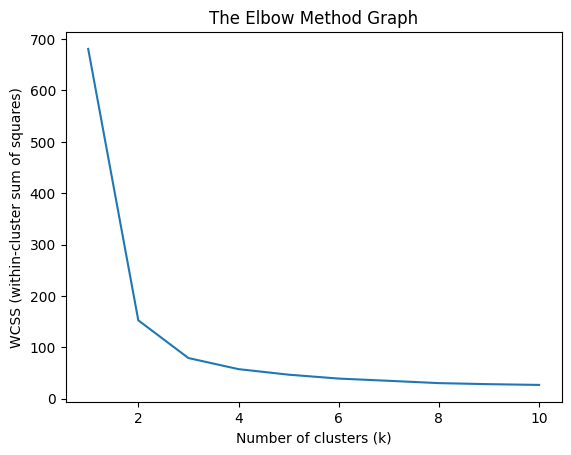

Best value for k: 3
Calinski-Harabasz score: 560.3660038653594


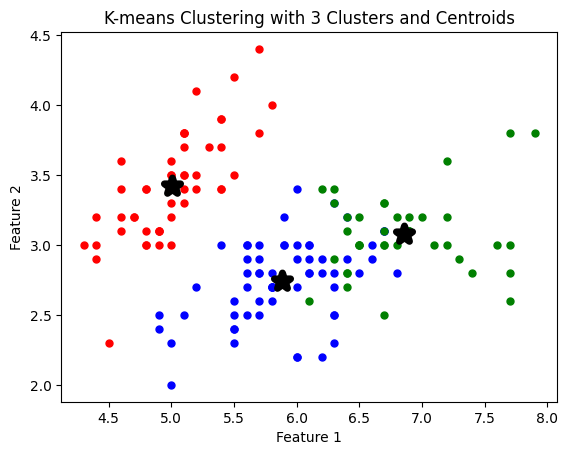

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = pd.read_csv('IRIS.csv')

# Extract features (drop 'Id' and 'Species' columns)
X = iris.drop(['Id', 'Species'], axis=1)

# WCSS (within-cluster sum of squares) list
wcss_list = []

# Elbow Method to find optimal k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (within-cluster sum of squares)')
plt.show()

# Determine the best value for k based on the Elbow Method
optimal_k = 3
print(f"Best value for k: {optimal_k}")

# Fit KMeans with the best k
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
# kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_optimal.fit(X)

# Get cluster labels
y_predict_optimal = kmeans_optimal.labels_

# Calculate Calinski-Harabasz score
ch_score = calinski_harabasz_score(X, y_predict_optimal)
print(f"Calinski-Harabasz score: {ch_score}")

# Visualize the clusters and centroids
colors = ["g.", "r.", "b.", "c.", "m.", "y.", "k."]
for i in range(len(X)):
    plt.plot(X.iloc[i, 0], X.iloc[i, 1], colors[y_predict_optimal[i] % len(colors)], markersize=10)

plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker="*", color='black',label='centroid' , s=150, linewidths=5, zorder=10)
plt.title(f'K-means Clustering with {optimal_k} Clusters and Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
